In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline #plotting matplotlib graphs just below code cells and storing them in the notebook document

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start= '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-03-04,98.870003,2792.810059
2019-03-05,99.089996,2789.649902
2019-03-06,98.930000,2771.449951
2019-03-07,98.550003,2748.929932
2019-03-08,98.410004,2743.070068


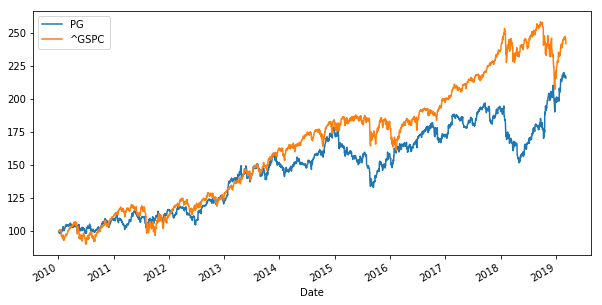

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [16]:
#Find the log returns for a day
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004755,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
2010-01-11,-0.003979,0.001745
2010-01-12,0.011397,-0.009425
2010-01-13,0.010293,0.008291
2010-01-14,0.000975,0.002423


In [6]:

log_returns.mean() * 250

PG       0.083498
^GSPC    0.095736
dtype: float64

In [8]:
log_returns.cov() *250

,PG,^GSPC
PG,0.021259,0.011595
^GSPC,0.011595,0.022340


In [7]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.532046
^GSPC,0.532046,1.000000


In [17]:
#Number of assets
num_assets = len(assets)
num_assets

2

In [12]:
#Find a random array with 2 numbers
arr = np.random.random(2)
arr

array([0.50056544, 0.20406555])

In [13]:
#This method does not work because the sum of the 2 assets don't =1
arr[0] + arr[1]

0.704630988727242

In [14]:
#Correct code to find a random weights for an asset that equal 1
weights = np.random.random(num_assets)
weights /= np.sum(weights) # W1/(W1+W2) + W2/(W1+W2) = 1
weights

array([0.29133927, 0.70866073])

In [15]:
weights[0] + weights[1]

1.0

##### Expect Portfolio Return

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.09217072369844817

##### Expected Portfolio Variance

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.017811409120365676

##### Expected Portfolio Volatility

In [22]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1334593912782674

In [23]:
pfolio_returns = [] #empty list we expect to fill with randomly generated returns
pfolio_vol = [] ##empty list we expect to fill with randomly generated variance

for x in range (1000): #Generate 1000 combinations
    weights = np.random.random(num_assets) # Number of assets = number of weights
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250) # Append adds each new prtfolio return value to portfolio returns
    pfolio_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))) # Append adds each new portfolio return value to portfolio volatility
    
pfolio_returns, pfolio_vol

([0.08734813581519814,
  0.08958888482500657,
  0.08788332938964574,
  0.08997588393419077,
  0.08986925369148803,
  0.08955835682852864,
  0.08443528812727734,
  0.0897067206838825,
  0.09529434692345731,
  0.09002656829324208,
  0.08968316338623693,
  0.08369363245608223,
  0.08811580405710259,
  0.08716500731731226,
  0.09071781366030789,
  0.08949248036765753,
  0.08971591627660418,
  0.08869674165382438,
  0.08967796389503714,
  0.08916186468783358,
  0.08997887437712075,
  0.08647356035344063,
  0.0918455019765383,
  0.0896401748270041,
  0.09356871884411631,
  0.08950721970349809,
  0.0854526110774815,
  0.08909680443932588,
  0.08879968593460429,
  0.08812827974812965,
  0.08490762689239782,
  0.09155125216098065,
  0.08686763263446325,
  0.09391986947155231,
  0.09099139860530177,
  0.08875381749131264,
  0.09033732519881271,
  0.0894339353152174,
  0.08653866098928979,
  0.09235328404316173,
  0.08856114943827482,
  0.08860492788203153,
  0.08592507979553662,
  0.095347913662

In [25]:
pfolio_returns = [] #empty list we expect to fill with randomly generated returns
pfolio_vol = [] ##empty list we expect to fill with randomly generated variance

for x in range (1000): #Generate 1000 combinations
    weights = np.random.random(num_assets) # Number of assets = number of weights
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250) # Append adds each new prtfolio return value to portfolio returns
    pfolio_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))) # Append adds each new portfolio return value to portfolio volatility
 
pfolio_returns = np.array(pfolio_returns) #organise as arrays
pfolio_vol = np.array(pfolio_vol)
    
pfolio_returns, pfolio_vol

(array([0.09299685, 0.08827846, 0.08474334, 0.09000547, 0.09453422,
        0.0910285 , 0.0882199 , 0.08710089, 0.08673923, 0.08613693,
        0.08884438, 0.09072477, 0.08751596, 0.08686497, 0.09301307,
        0.09292978, 0.08487813, 0.09167648, 0.08815611, 0.08880249,
        0.0911176 , 0.08901544, 0.09055803, 0.08626033, 0.08701464,
        0.08799876, 0.09127172, 0.09167131, 0.09187634, 0.09314548,
        0.08972837, 0.08951311, 0.08850973, 0.08396846, 0.09009106,
        0.09215207, 0.08957026, 0.08515924, 0.09010461, 0.09200721,
        0.08428879, 0.09216065, 0.09276812, 0.09418218, 0.09072333,
        0.09222553, 0.0896673 , 0.0912877 , 0.08910596, 0.08767413,
        0.09336137, 0.08959346, 0.09278648, 0.09231373, 0.09030943,
        0.09118335, 0.08496575, 0.09047146, 0.08936175, 0.08596618,
        0.08859467, 0.09262323, 0.09257057, 0.09255654, 0.09091089,
        0.08552721, 0.09329106, 0.08966357, 0.08792231, 0.08832448,
        0.09196569, 0.08353624, 0.08832777, 0.09

In [28]:
#Create a table using data frame with pfolio_returns & pfolio_vol
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_vol})

In [29]:
portfolios.head()

,Return,Volatility
0,0.092997,0.136207
1,0.088278,0.129705
2,0.084743,0.139658
3,0.090005,0.129430
4,0.094534,0.142921


In [30]:
portfolios.tail()

,Return,Volatility
995,0.089949,0.129389
996,0.084289,0.141760
997,0.090417,0.129827
998,0.089503,0.129186
999,0.087629,0.130616


Text(0,0.5,'Expected Return')

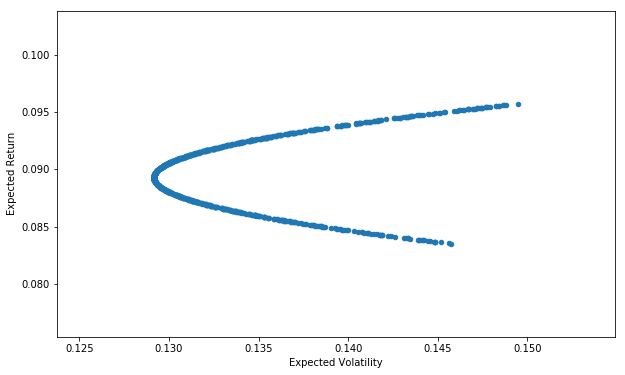

In [36]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')